In [58]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import animation

In [59]:
class particle():
    def __init__(self, position, direction):
        self.p = np.array(position)
        self.d = direction
        self.m = 1
        self.dt = 0.25 #s
        self.initrho = 1
        self.rho = 0
        self.pre = 0
        self.vmax = 10
        self.a = 0
        self.g = np.array([0, 0, 9.81])
    
    def get_magnitude(self):
        return np.linalg.norm(self.p)
    
    def get_pos(self):
        return self.p
    
    def set_pos(self, new_pos):
        self.p = new_pos

    def get_dir(self):
        return self.d
    
    def get_initrho(self):
        return self.initrho
    
    def get_rho(self):
        return self.rho
    
    def get_initpre(self):
        return self.initpre
    
    def get_pre(self):
        return self.pre
    
    def get_acc(self):
        return self.a
    
    def get_m(self):
        return self.m

In [97]:
class particle_array():
    def __init__(self, n, dims, seed = 4):
        # n is the number of particles
        # dims is an array with 6 elements
        # seed is a random seed
        self.seed = random.seed(seed)
        self.xmin = dims[0]
        self.xmax = dims[1]
        self.ymin = dims[2]
        self.ymax = dims[3]
        self.zmin = dims[4]
        self.zmax = dims[5]
        
        pPositions = []
        for i in range(n ** 3):
            pPositions.append([
                random.uniform(self.xmin, self.xmax),
                random.uniform(self.ymin, self.ymax),
                random.uniform(self.zmin, self.zmax)
            ])
            
        self.particles = [particle(pPositions[i], [0, 0, 0]) for i in range(n ** 3)]
        
        self.calc_density()
        self.calc_pressure()
        self.calc_acc()
        self.calc_vel()

    def get_boundaries(self):
        return np.array([self.xmin, self.xmax, self.ymin, self.ymax, self.ymin, self.ymax])
        
    def get_pos_n(self, n):
        return self.particles[n].get_pos()
    
    def get_dir_n(self, n):
        return self.particles[n].get_dir()
    
    def get_pre_n(self, n):
        return self.particles[n].get_pre()
    
    def get_specific_accel(self, n):
        return self.particles[n].get_acc()
    
    def print_pos(self):
        for p in self.particles:
            print(p.get_pos())
            
    def print_dir(self):
        for p in self.particles:
            print(p.get_dir())
            
    def print_initrho(self):
        for p in self.particles:
            print(p.get_initrho())
            
    def print_rho(self):
        for p in self.particles:
            print(p.get_rho())
            
    def print_initpre(self):
        for p in self.particles:
            print(p.get_initpre())
            
    def print_pre(self):
        for p in self.particles:
            print(p.get_pre())
            
    def get_acc(self):
        for p in self.particles:
            print(p.get_acc())
            
    def get_vel(self):
        for p in self.particles:
            print(p.get_dir())
            
    def calc_acc(self):
        for p1 in self.particles:
            temp = np.array([0,0,0], dtype = float)
            for p2 in self.particles:
                paired_acc = 0
                if id(p1) != id(p2):
                    paired_acc = p2.m * ((p1.pre / (p1.rho ** 2)) + (p2.pre / (p2.rho ** 2))) * (self.dgaus_kern(p1, p2))  
                temp += paired_acc
            p1.a = temp
                           
    def calc_vel(self):
        for p in self.particles:
            for i in range(3):
                new_vel = p.get_dir() + (p.get_acc() * p.dt) - (p.g * p.dt)
                magnitude = np.linalg.norm(new_vel)
                if magnitude > p.vmax:
                    new_vel = (p.vmax / magnitude) * new_vel
                p.d = new_vel

    def move(self):
        for p in self.particles:
            new_pos = p.get_pos() + (p.d * p.dt)
            if new_pos[0] < self.xmin:
                new_pos[0] = self.xmin
            if new_pos[0] < self.xmax:
                new_pos[0] = self.xmax
            if new_pos[1] < self.ymin:
                new_pos[1] = self.ymin
            if new_pos[1] < self.ymax:
                new_pos[1] = self.ymax
            if new_pos[2] < self.zmin:
                new_pos[2] = self.zmin
            if new_pos[2] < self.zmax:
                new_pos[2] = self.zmax
            p.set_pos(new_pos)
                           
    def calc_density(self):
        for p1 in self.particles:
            temp = 0
            for p2 in self.particles:
                if id(p1) != id(p2):
                    temp += p2.m * self.gaus_kern(p1, p2)
            p1.rho = temp
               
    def calc_pressure(self):
        for p in self.particles:
            p.pre = (((0.00025**2) * 1)/7) * ((p.rho / 1)**7 - 1)
            
    def gaus_kern(self, p1, p2, h = 1, d = 3):
        dir_vec = p1.get_pos() - p2.get_pos()
        dist_between = np.linalg.norm(dir_vec)
        return ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2)))
    
    def dgaus_kern(self, p1, p2, h = 1, d = 3):
        dir_vec = p1.get_pos() - p2.get_pos()
        dist_between = np.linalg.norm(dir_vec)
        return (-2 * (h ** -2)) * ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2)))
                           
##########################
# SANITY LINE ABOVE HERE #
##########################
            
"""
    
class pairwise_calculator():
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def gaus_kern(self, p1, p2, h = 1, d = 3):
        dir_vec = self.p1.get_pos() - self.p2.get_pos()
        dist_between = np.linalg.norm(dir_vec)
        return ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2)))
    
    def dgaus_kern(self, p1, p2, h = 1, d = 3):
        dir_vec = self.p1.get_pos() - self.p2.get_pos()
        dist_between = np.linalg.norm(dir_vec)
        return (p1.p - p2.p) * (-2 * (h ** -2)) * ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2)))
"""
print("hello")

hello


In [87]:
c8 = particle(np.array([1, 0, 0]), [3, 2, 1])

print(c8.g * c8.dt)

[0.     0.     2.4525]


In [88]:
c3 = np.array([1, 0, 0])
c4 = np.array([3, 2, 1])
print(c3 - c4)

c5 = particle(np.array([1, 0, 0]), [3, 2, 1])
c6 = particle(np.array([3, 2, 1]), [2, 1, 1])

#c7 = pairwise_calculator(c5, c6)
#print(c7.gaus_kern())
#print(c7.dgaus_kern())

[-2 -2 -1]


In [89]:
check2 = particle_array(3, [1, 2, 3, 4, 5, 6])
print(check2.get_boundaries())
print(check2.print_pos())
#check2.print_pre()

[1 2 3 4 3 4]
[1.23604809 3.10316603 5.39605824]
[1.15497227 3.0665151  5.40159101]
[1.91795504 3.80045235 5.7651626 ]
[1.22192818 3.53668001 5.27668264]
[1.17266453 3.10618329 5.21440043]
[1.92747563 3.82892005 5.80665235]
[1.80044784 3.19343562 5.30984996]
[1.6269756  3.73189471 5.85464836]
[1.88005075 3.08671825 5.60585188]
[1.67170146 3.50595378 5.17779017]
[1.47358789 3.08934621 5.93458836]
[1.86548417 3.54763887 5.30024574]
[1.90887029 3.5723668  5.88231724]
[1.84804409 3.50837238 5.41394604]
[1.59891247 3.43104302 5.16132061]
[1.3051116  3.81259232 5.04323847]
[1.046322   3.62635075 5.28043321]
[1.53462179 3.47124009 5.34284327]
[1.99727887 3.19557349 5.41279466]
[1.20267062 3.63266498 5.27630483]
[1.35583075 3.74694268 5.3206689 ]
[1.55852898 3.9043151  5.10097944]
[1.06161024 3.22886944 5.76516224]
[1.61543208 3.23741717 5.331067  ]
[1.17753969 3.45901875 5.04281119]
[1.69729188 3.89592778 5.9547376 ]
[1.73487796 3.95986759 5.01818753]
None


In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#Creation of my particle
plot_particles = particle_array(2, [0, 5, 0, 5, 0, 10])
plot_particles.print_pos()
duration = 1
dt = 0.01
table = {}
def memoize():
    global table, duration, dt
    current_time = 0
    while current_time <= duration:
        plot_particles.move()
        plot_particles.calc_density()
        plot_particles.calc_pressure()
        plot_particles.calc_acc()
        plot_particles.calc_vel()
        temp = []
        for particle in plot_particles.particles:
            temp.append(list(particle.p))
        table[current_time] = temp
        current_time += dt
        plot_particles.print_pos()
    return table
x = memoize()
print("complete")

[1.18024045 0.51583017 3.96058243]
[0.77486135 0.33257548 4.01591014]
[4.58977522 4.00226176 7.65162603]
[1.10964088 2.68340004 2.76682643]
[0.86332265 0.53091646 2.14400433]
[4.63737816 4.14460024 8.06652347]
[4.00223919 0.96717809 3.09849957]
[3.13487801 3.65947354 8.54648358]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.  5. 10.]
[ 5.00005611  5.00005611 10.        ]
[ 5.00000376  5.00000376 10.        ]
[ 5.00000006  5.00000006 10.        ]
[ 5.00000585  5.00000585 10.        ]
[ 5.00000829  5.00000829 10.        ]
[ 5.00000007  5.00000007 10.        ]
[ 5.00007097  5.00007097 10.        ]
[ 5.00000009  5.00000009 10.        ]
[ 5.00008515  5.00008515 10.        ]
[ 5.00000569  5.00000569 10.        ]
[ 5.00000007  5.00000007 10.        ]
[ 5.00000887  5.00000887 10.        ]
[ 5.00001256  5.00001256 10.        ]
[ 5.0000001  5.0000001 10.       ]
[ 5.00010771  5.00010771 10.        ]
[ 5.00000013  5.00000013 10.        ]
[ 5

In [94]:
print(x)

{0: [[5.0, 5.0, 10.0], [5.0, 5.0, 10.0], [5.0, 5.0, 10.0], [5.0, 5.0, 10.0], [5.0, 5.0, 10.0], [5.0, 5.0, 10.0], [5.0, 5.0, 10.0], [5.0, 5.0, 10.0]], 0.01: [[5.000056108315795, 5.000056108315795, 10.0], [5.000003758396245, 5.000003758396245, 10.0], [5.000000057250012, 5.000000057250012, 10.0], [5.000005852962111, 5.000005852962111, 10.0], [5.000008286009395, 5.000008286009395, 10.0], [5.0000000740920685, 5.0000000740920685, 10.0], [5.000070969837886, 5.000070969837886, 10.0], [5.000000094275395, 5.000000094275395, 10.0]], 0.02: [[5.000085151943319, 5.000085151943319, 10.0], [5.00000569097211, 5.00000569097211, 10.0], [5.00000007307094, 5.00000007307094, 10.0], [5.000008870274761, 5.000008870274761, 10.0], [5.0000125633520724, 5.0000125633520724, 10.0], [5.000000098635186, 5.000000098635186, 10.0], [5.000107709971856, 5.000107709971856, 10.0], [5.000000129271082, 5.000000129271082, 10.0]], 0.03: [[5.000100179271138, 5.000100179271138, 10.0], [5.000006677989489, 5.000006677989489, 10.0],

<IPython.core.display.Javascript object>


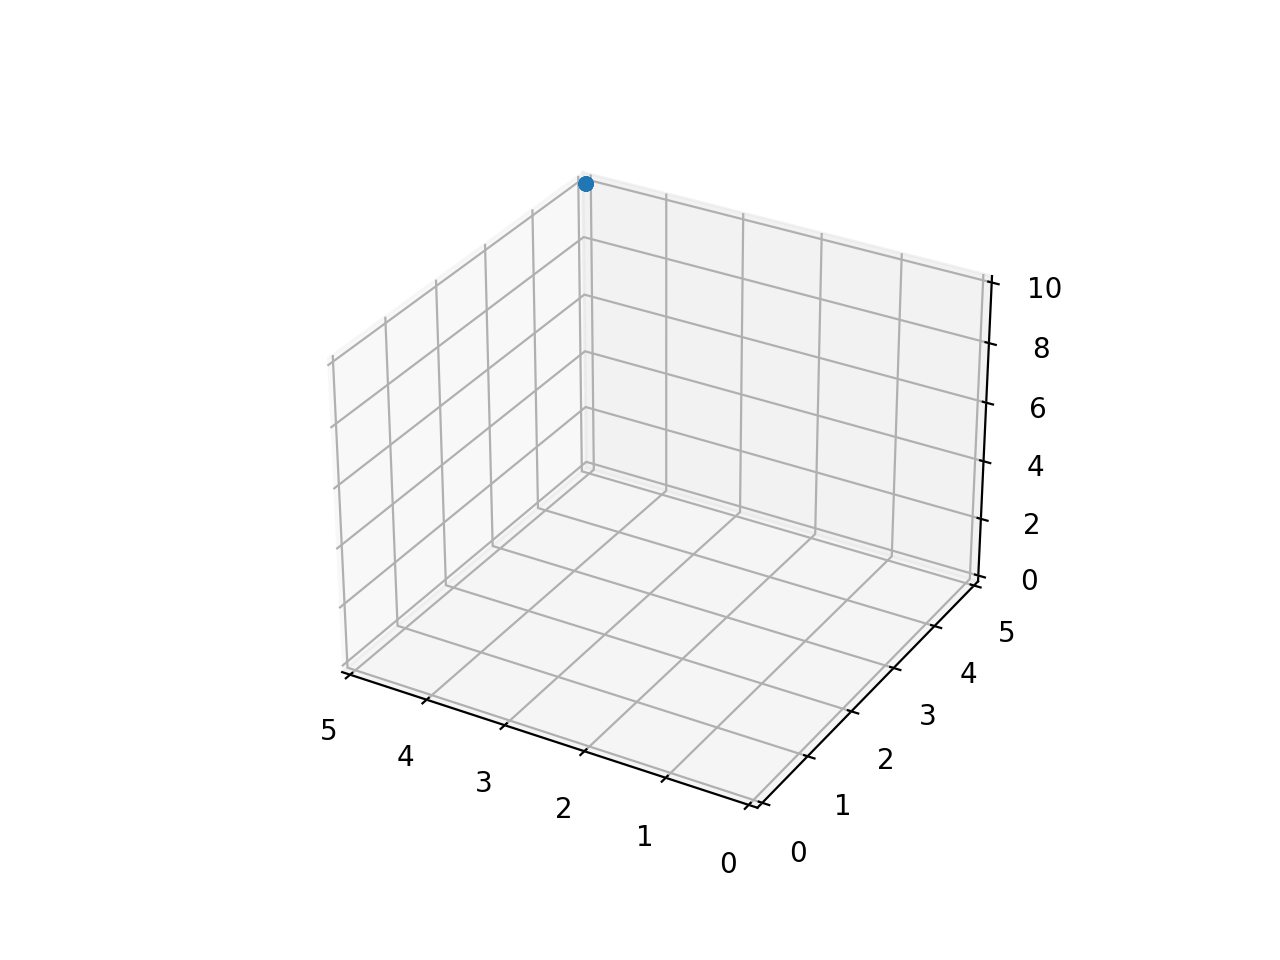

In [95]:
%matplotlib notebook
##############################################################
#The creation of my figure                                   #
fig = plt.figure()                                           #
ax = fig.add_subplot(111, projection='3d')                   #
#Creating a global variable scat to store particle positions #
scat = ax.scatter([], [], [])                                #
##############################################################

my_timer = 0 
dt = 0.01

def init():
    """
    Creates my starting particle positions on the graph
    """
    ax.clear()
    ax.set_xlim3d([0, 5])
    ax.invert_xaxis()
    ax.set_ylim3d([0, 5])
    ax.set_zlim3d([0, 10])
    scat = ax.scatter(
        [particle[0] for particle in table[my_timer]],
        [particle[1] for particle in table[my_timer]],
        [particle[2] for particle in table[my_timer]]
    )
    return scat,


def animate(frame):
    global my_timer, dt
        
    scat._offsets3d = (
        [particle[0] for particle in table[my_timer]],
        [particle[1] for particle in table[my_timer]],
        [particle[2] for particle in table[my_timer]]
    )
    my_timer += dt
    return scat,

#Interval here delays the time per frame shown
ani = FuncAnimation(fig, animate, frames=duration, init_func=init, blit=False, interval = 100)
plt.show()